# Метод главных компонент - (PCA - Principal Component Analysis) - Часть 2 - Реализация в Scikit-Learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Реализация метода главных компонент в Scikit-Learn
### Масштабирование данных

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
scaled_X = scaler.fit_transform(df)

In [17]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# PCA в Scikit-Learn

In [20]:
from sklearn.decomposition import PCA

In [22]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |
 |  Principal component analysis (PCA).
 |
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.
 |
 |  No

In [24]:
pca_model = PCA(n_components=2)

In [29]:
pc_results = pca_model.fit_transform(scaled_X)

Можно также запустить отдельно метод `.fit()` и метод `.transform()`. Метод `.fit()` - вычисляет собственные вектора и собственные значения, а метод `.transform()` - проецирует исходные данные в уменьшенное пространство главных компонент.

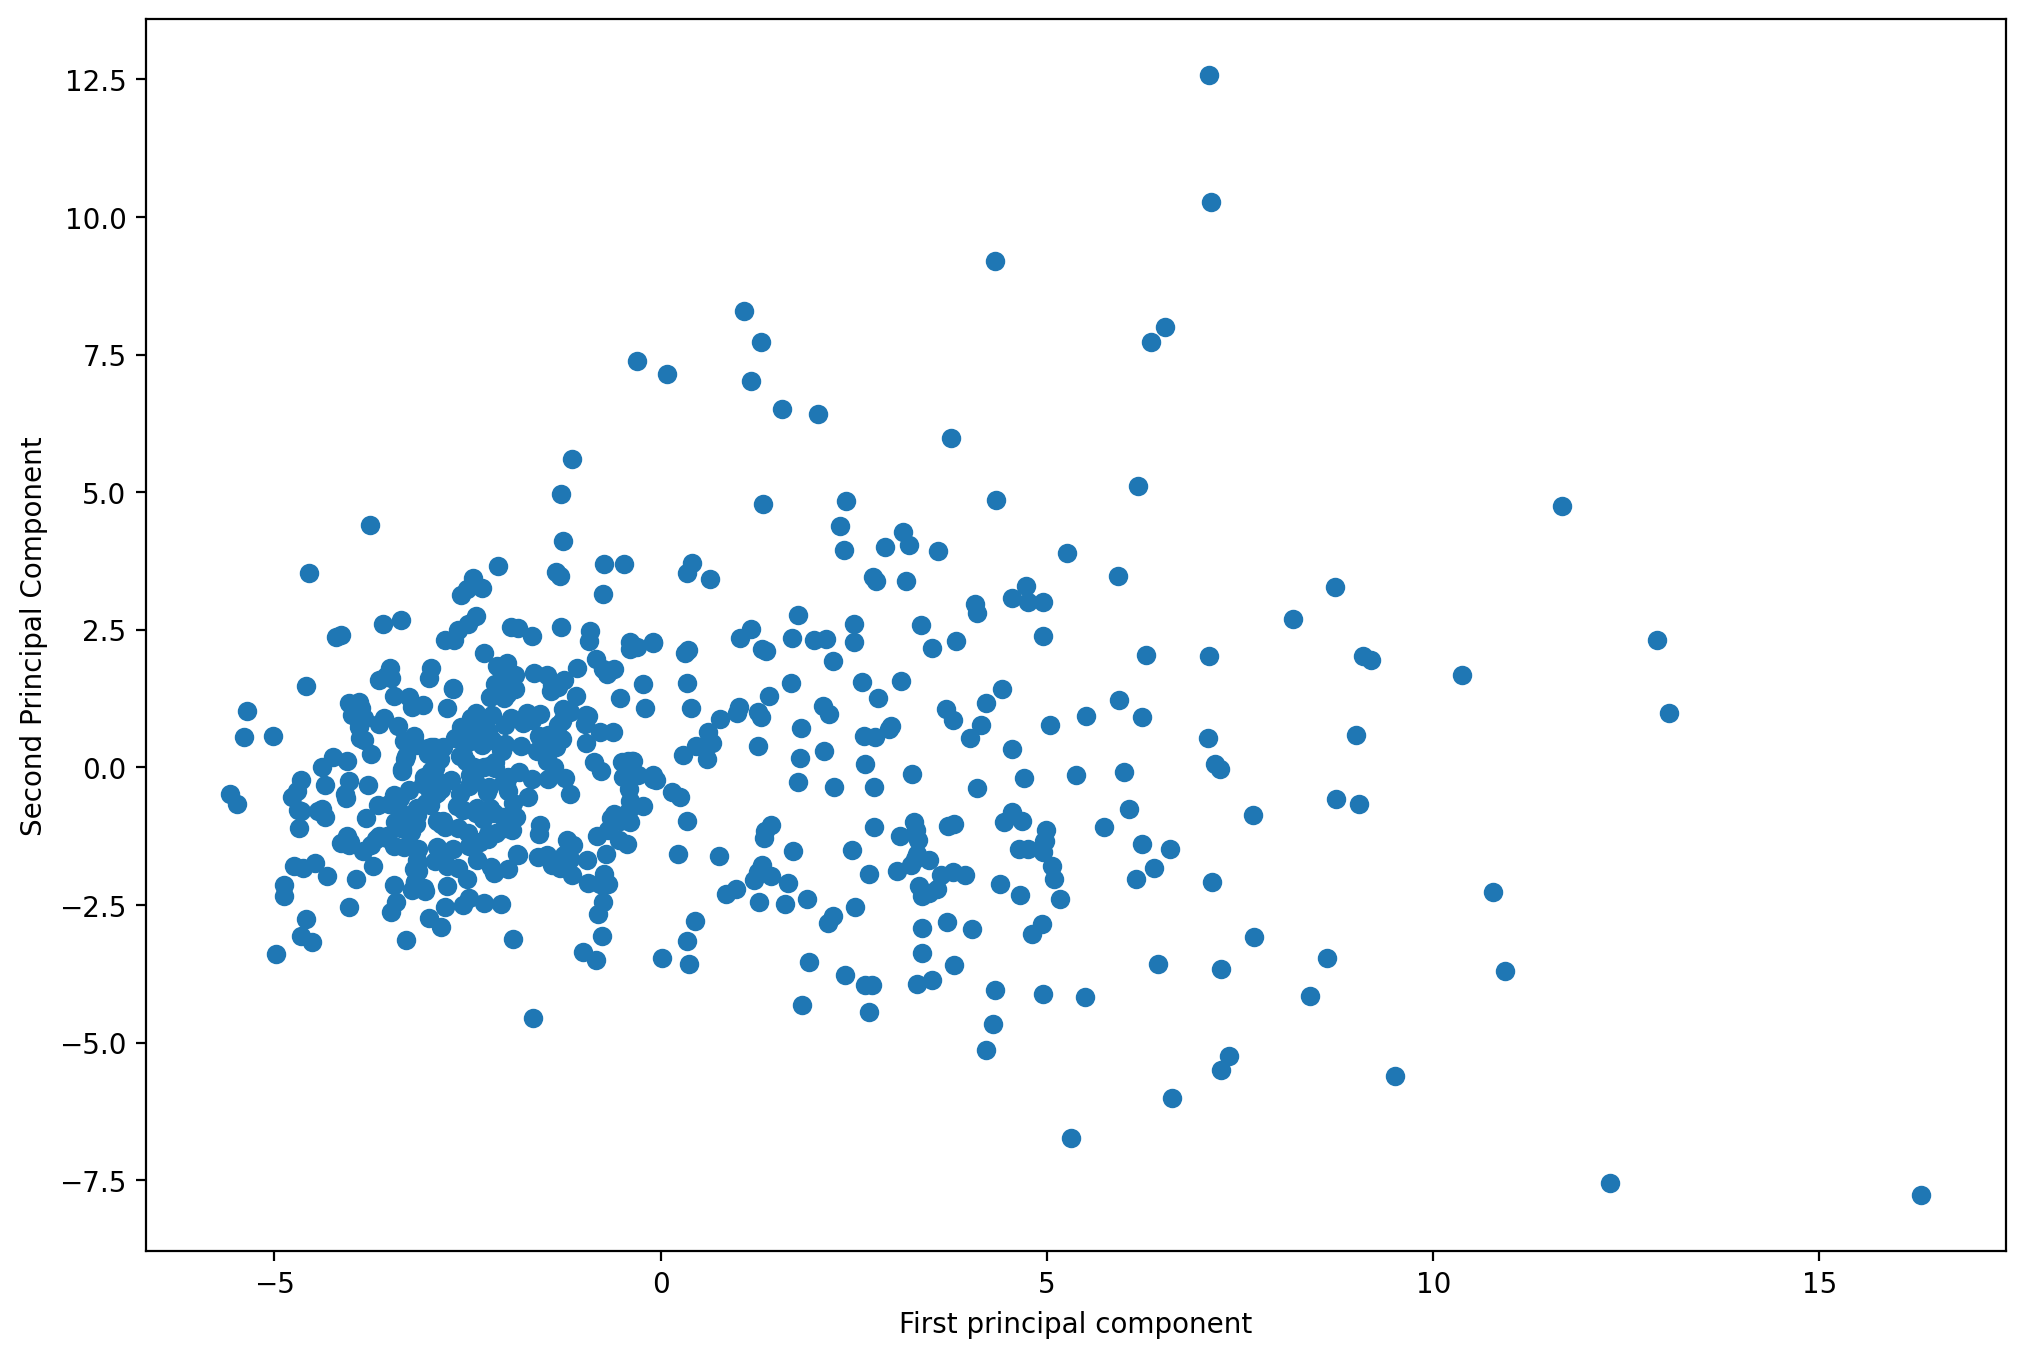

In [31]:
plt.figure(figsize=(12, 8), dpi=200)
plt.scatter(pc_results[:, 0], pc_results[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [33]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer_dictionary = load_breast_cancer()

In [37]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
cancer_dictionary['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

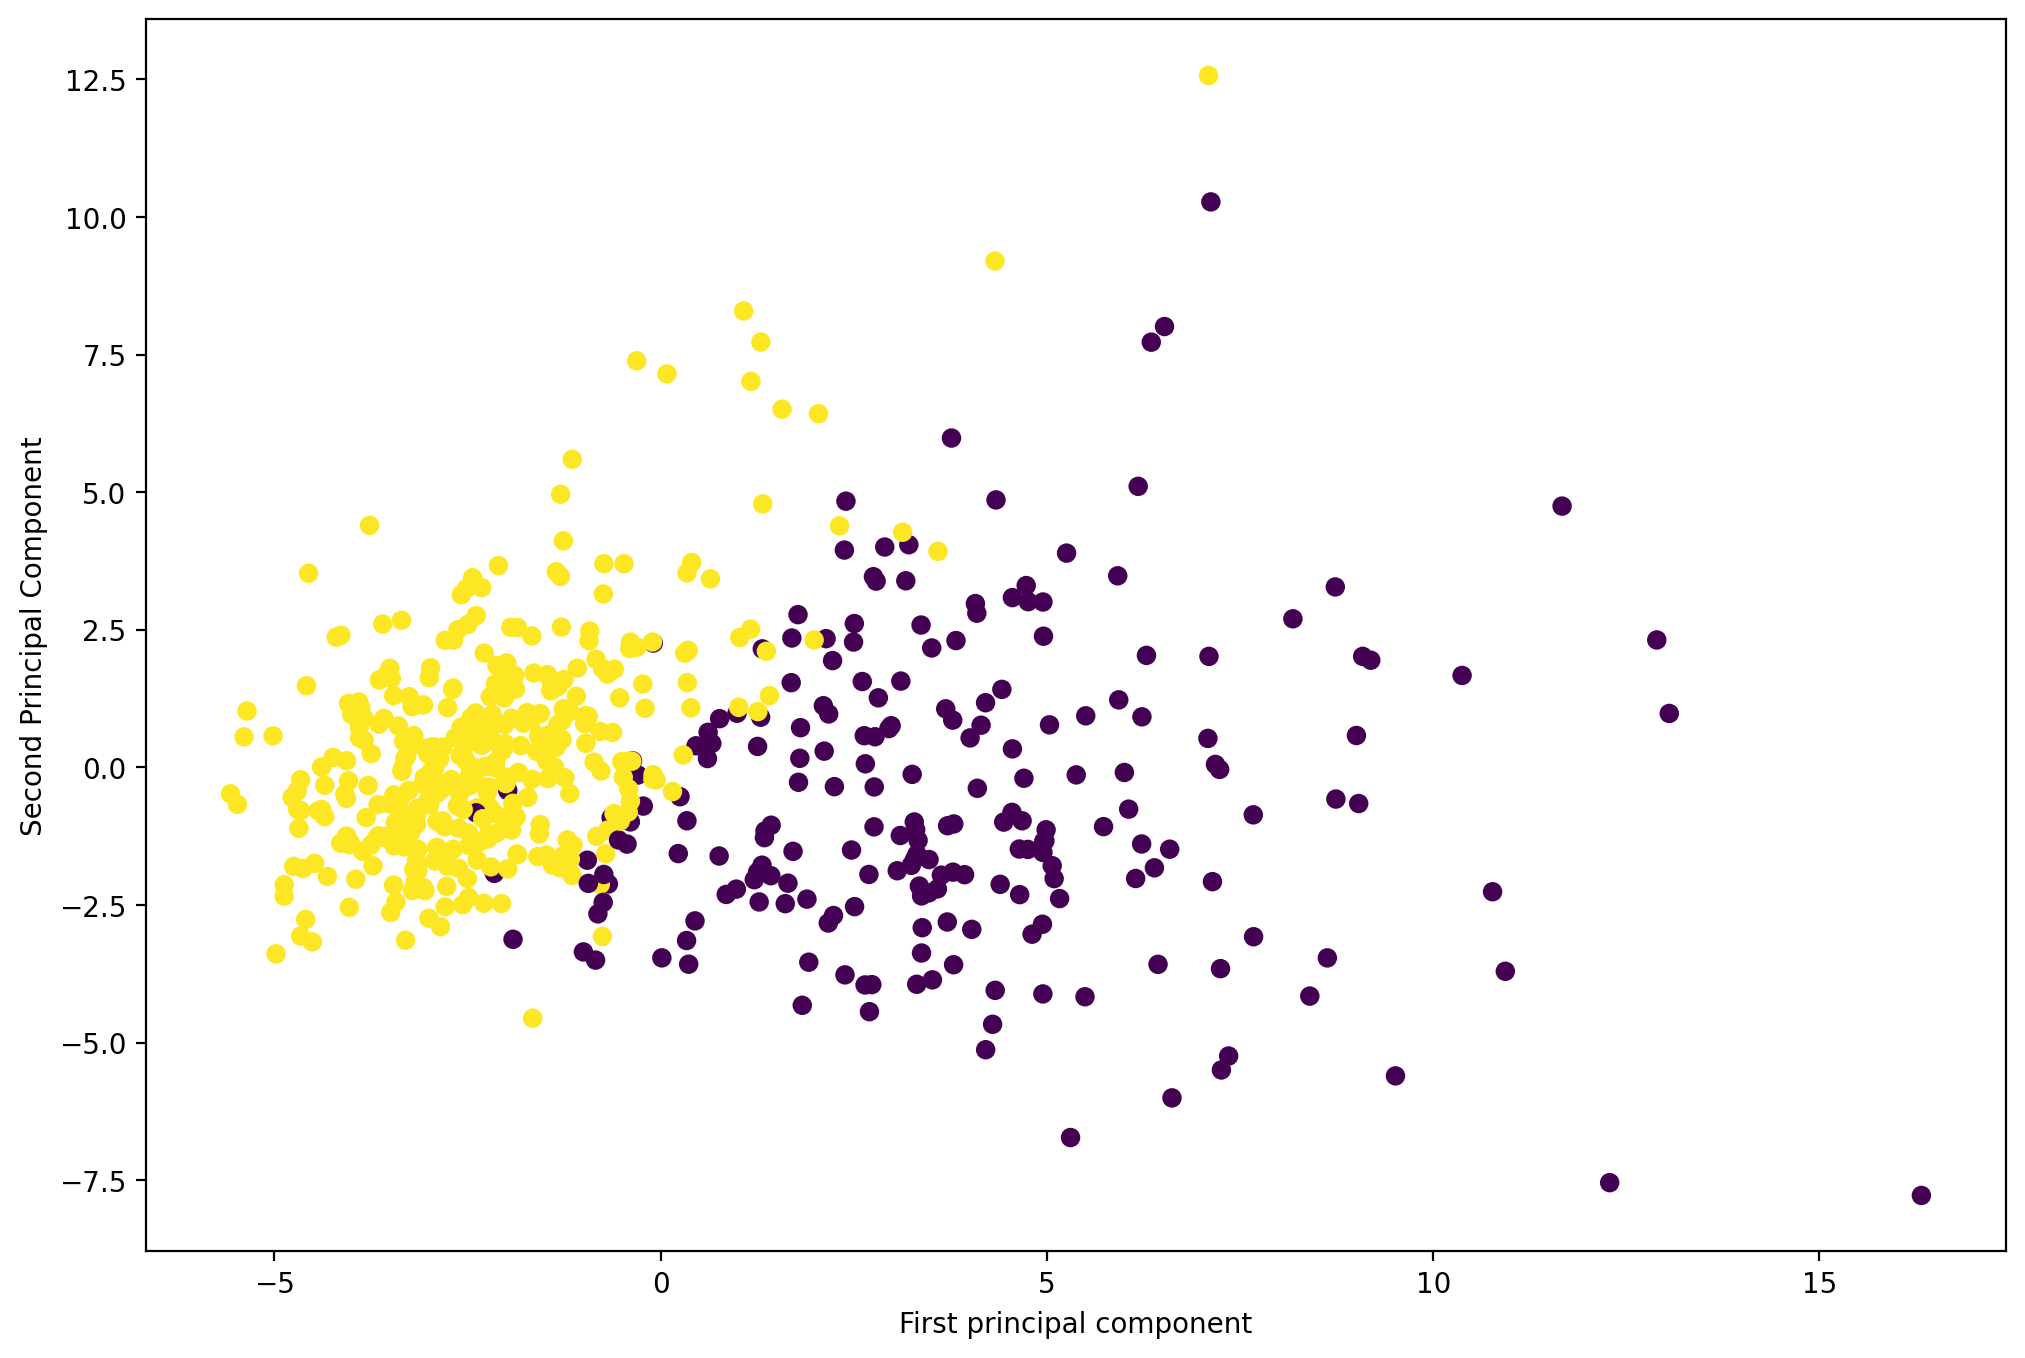

In [41]:
plt.figure(figsize=(12, 8), dpi=200)
plt.scatter(pc_results[:, 0], pc_results[:, 1], c=cancer_dictionary['target'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

## Атрибуты обученной модели

In [44]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

В этой матрице numpy каждая строка - это отдельный главный компонент в исходном пространстве признаков. Эти главные компоненты являются осями в пространстве главных компонент, и они представляют собой направления максимальной вариативности в данных. Эти компоненты отсортированы по значениям explained_variance_.

Мы можем визуализировать эти данные с помощью тепловой карты heatmap:

In [47]:
pca_model.components_.shape

(2, 30)

In [50]:
df_components = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns=df.columns)

In [52]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


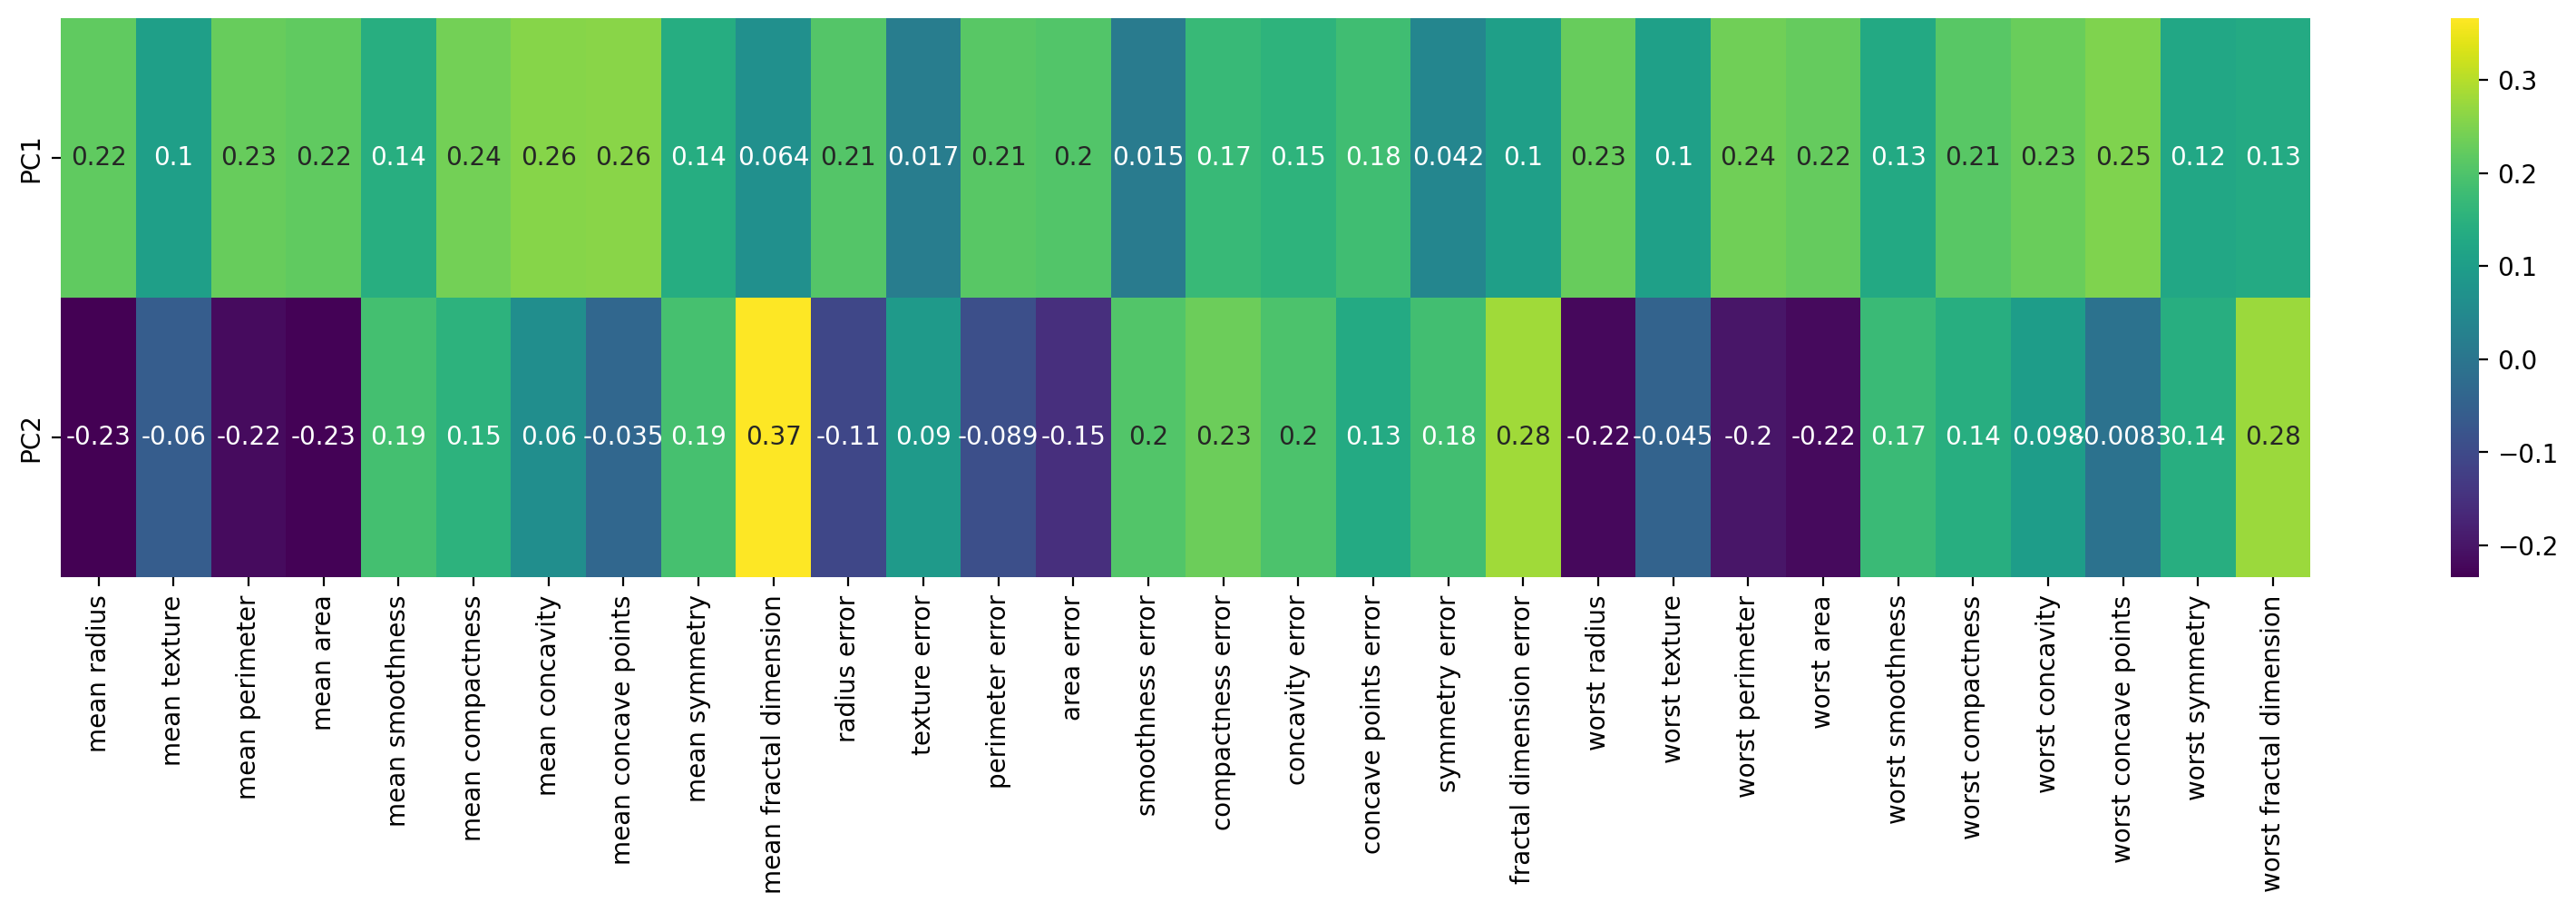

In [56]:
plt.figure(figsize=(20, 4), dpi=200)
sns.heatmap(df_components, annot=True, cmap='viridis')
plt.show()

In [59]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

Эти числа измеряются в долях. Первый главный компонент объясняет 44% вариативности данных, а второй главный компонент объясняет 19% вариативности данных.

In [62]:
np.sum(pca_model.explained_variance_ratio_)

np.float64(0.6324320765155945)

Суммарно эти два компонента могут объяснить 63% вариативности в данных.

## Как будет вести себя объяснённая вариативность при увеличении количества главных компонент?

In [67]:
pca_30 = PCA(n_components=30)

In [69]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [71]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [73]:
np.sum(pca_30.explained_variance_ratio_)

np.float64(0.9999999999999999)

Мы не теряем вариацию в данных, так как не уменьшаем размерность пространства.

In [76]:
explained_variance = []

for n in range(1, 30):
    
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

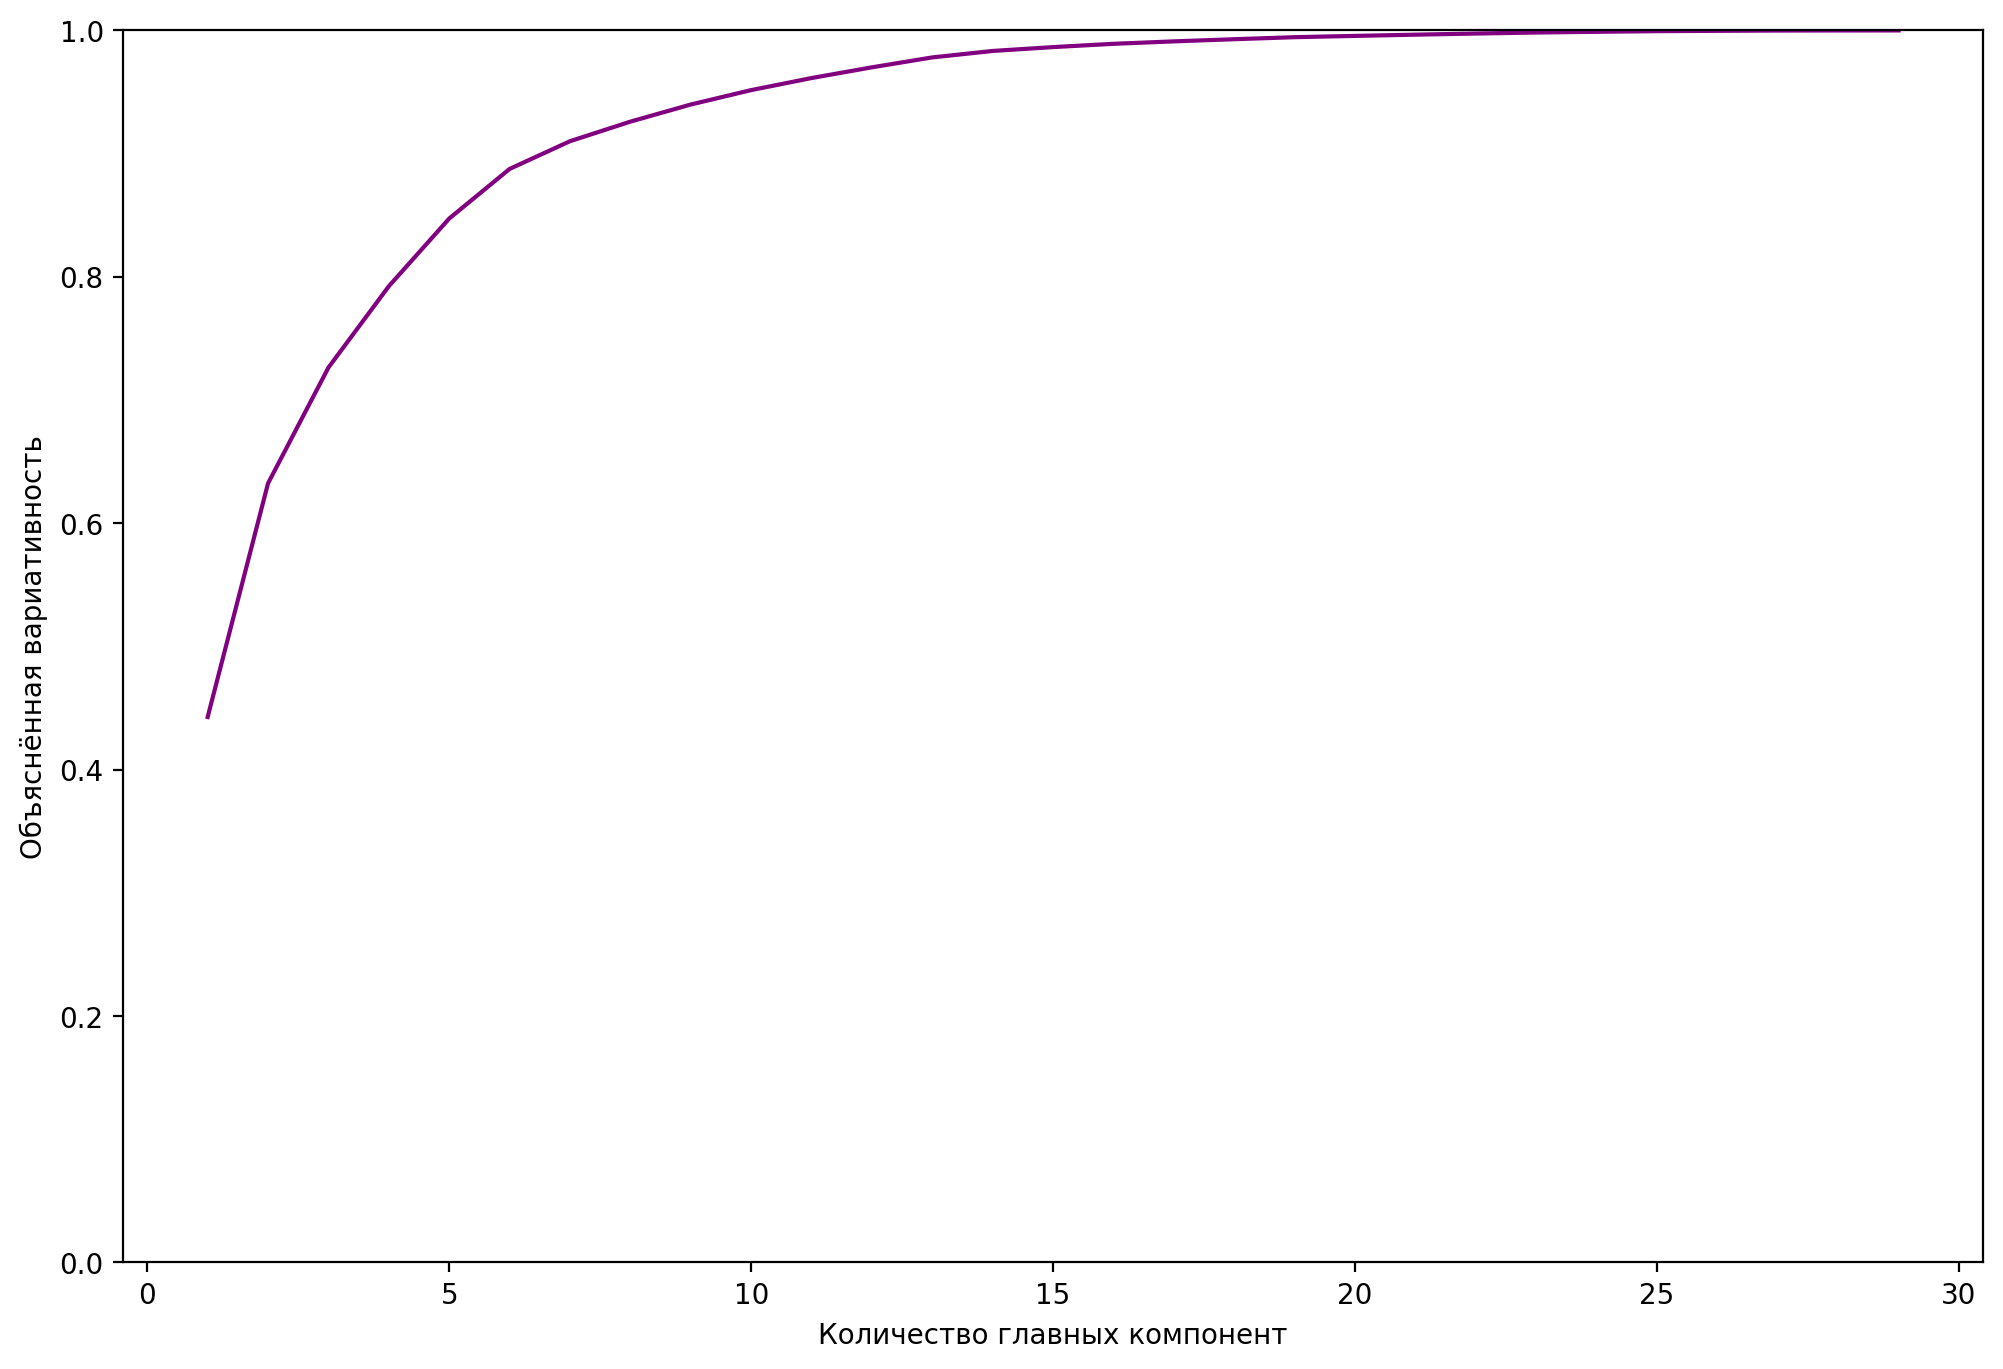

In [80]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 30), explained_variance, c='purple')
plt.ylim(0, 1)
plt.xlabel('Количество главных компонент')
plt.ylabel('Объяснённая вариативность')
plt.show()

**ВАЖНО: по вертикальной оси график начинается не с 0.**

Видно, что даже в случае одной компоненты - уже получается 40% объяснённой вариативности. Далее, чем больше главных компонент добавляется, тем больше вариативности в данных объясняется.

Где-то в районе 10 компонент график начинает выходить на плато, когда дополнительные компоненты добавляют всё меньше и меньше вариативности.

Такой график можно использовать для метода локтя, чтобы выбрать количество главных компонент.